Model of a generalized Josephson Junction Quantum Memory Device

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
def generate_random_numbers(n):
    random_numbers = [random.random() for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 300
random_numbers = np.sort(generate_random_numbers(2 * num_of_junctions))

In [45]:
arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
# arrayOfJunctions = random_numbers

In [46]:
criticalCurrents = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

prints out the elements in the junction in a better format

In [47]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0 - 0.2, 0.4 - 0.6, 0.9 - 1 

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [48]:
def current(B, arrJ, arrC, y, numOfSegments): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    for n in range(limit):
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [49]:
def maxCurrent(B, arrayJ, arrayC, numOfSegments): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma, numOfSegments))
    return max(dummyArray)

In [50]:
MagField = np.linspace(-5, 5, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [51]:
IMaxPoint = []

In [52]:
numOfSegments = 2

In [53]:
length = len(MagField)
for i in range(length):
    IMaxPoint.append(maxCurrent(MagField[i], arrayOfJunctions, criticalCurrents, numOfSegments) / int(len(arrayOfJunctions) / 2)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

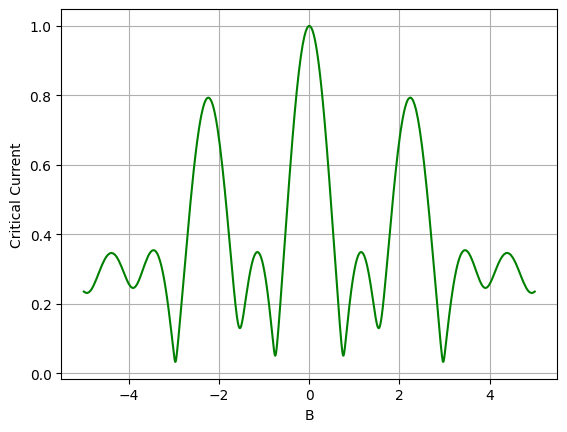

In [54]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.grid()            
plt.show()

In [55]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

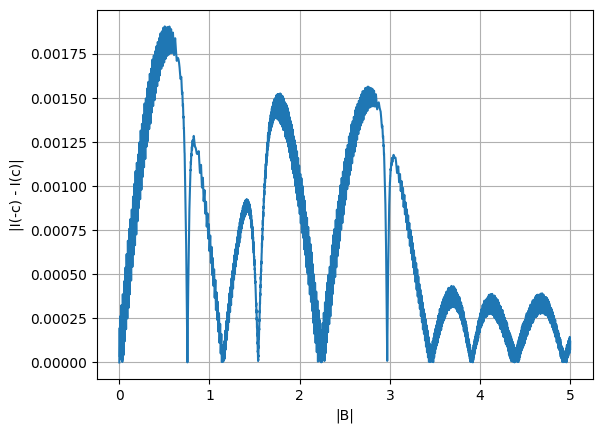

In [56]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-c) - I(c)|')
plt.grid()
plt.show()